In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import folium
from folium.plugins import HeatMap

In [ ]:
bus_stops_df = pd.read_excel('flexi_bus_stops.xls')
trip_data_df = pd.read_excel('flexi_trip_data.xls')

In [3]:
bus_stops_df.columns

Index(['index', 'name', 'district', 'latitude', 'longitude'], dtype='object')

In [4]:
import os
from ydata_profiling import ProfileReport

report_file = 'vgi_bus_stops_report.html'

if not os.path.exists(report_file):
    profile = ProfileReport(bus_stops_df, title = 'VGI Challenge - Report')

    profile.to_file('vgi_bus_stops_report_1.html')
    profile.dump('report_1')

profile = ProfileReport().load('report_1.pp')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import os
from ydata_profiling import ProfileReport

report_file = 'vgi_trip_data_report.html'

if not os.path.exists(report_file):
    profile = ProfileReport(trip_data_df, title = 'VGI Challenge - Report')

    profile.to_file('vgi_trip_data_report_1.html')
    profile.dump('report_2')

profile = ProfileReport().load('report_2.pp')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
bus_stops_df.nunique()

df_index     70
name         70
district     30
latitude     70
longitude    70
dtype: int64

### Check constant pairs Pickup - Dropoff (how many peaople use one route constantly)

In [7]:
location_df = bus_stops_df[['latitude', 'longitude', 'name', 'df_index']]

In [8]:
bus_stop_map = folium.Map(location=[location_df['latitude'].iloc[0], location_df['longitude'].iloc[0]], zoom_start=10)

# Add each bus stop to the map
for _, row in location_df.iterrows():
    popup_text = f"Name: {row['name']}<br>Index: {row['df_index']}"
    folium.Marker(location=[row['latitude'], row['longitude']], popup=popup_text).add_to(bus_stop_map)

# Get the coordinates for the route from index 0 to 19
route_coordinates = location_df.loc[0:19, ['latitude', 'longitude']].values.tolist()

# Add the route to the map with a red line
folium.PolyLine(route_coordinates, color='red').add_to(bus_stop_map)



In [9]:
bus_stop_map

In [ ]:
trip_data_df['Pickup ID'].nunique()

67

In [ ]:
trip_data_df['Dropoff ID'].nunique()

66

In [ ]:
trip_data_df['Status'].value_counts()

Status
Validated                   2225
Cancelled by client         1173
Cancelled by driver          424
Changed by admin               9
Changed by client              5
Cancelled by call center       2
Name: count, dtype: int64

In [ ]:
trip_data_df['Status'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(3, 3), title='Trip Status Distribution')

plt.ylabel('')  # Hide the y-label
plt.show()

C:\Users\Rusel\AppData\Local\Temp\ipykernel_18544\161403901.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [ ]:
trip_data_df[trip_data_df['Status'] != 'Validated'][['Status']].value_counts().sum()

1613

In [ ]:
trip_data_df['Pickup ID'].value_counts()
plt.figure(figsize=(10, 2))
merged_df['Pickup ID'].value_counts().plot(kind='bar', title='Pickup ID Frequency Distribution')

<Axes: title={'center': 'Pickup ID Frequency Distribution'}, xlabel='Pickup ID'>

In [ ]:
trip_data_df['Passenger status'].value_counts()

Passenger status
Trip completed    2225
Cancelled         1613
Name: count, dtype: int64

In [ ]:
plt.figure(figsize=(10, 2))
trip_data_df['Dropoff ID'].value_counts().plot(kind='bar', title='Dropoff ID Frequency Distribution')
plt.show()

C:\Users\Rusel\AppData\Local\Temp\ipykernel_18544\2280138839.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [ ]:
# Calculate the percentage of cancelled orders for each Pickup ID
cancelled_orders = trip_data_df[trip_data_df['Status'].str.contains('Cancelled')]
pickup_cancelled_percentage = cancelled_orders['Pickup ID'].value_counts() / trip_data_df['Pickup ID'].value_counts() * 100

# Find the Pickup ID with the highest percentage of cancelled orders
max_cancelled_pickup_id = pickup_cancelled_percentage.idxmax()
max_cancelled_percentage = pickup_cancelled_percentage.max()

print(f"Pickup ID with the highest percentage of cancelled orders: {max_cancelled_pickup_id} ({max_cancelled_percentage:.2f}%)")

Pickup ID with the highest percentage of cancelled orders: 54 (100.00%)


In [19]:
pickup_cancelled_percentage.fillna(0, inplace=True)
pickup_cancelled_percentage.sort_values(ascending=False, inplace=True)
pickup_cancelled_percentage

plt.figure(figsize=(10, 2))
pickup_cancelled_percentage.plot(kind='bar', title='Percentage of Cancelled Orders for Each Pickup ID')

<Axes: title={'center': 'Percentage of Cancelled Orders for Each Pickup ID'}, xlabel='Pickup ID'>

In [ ]:
route_counts = trip_data_df.groupby(['Pickup ID', 'Dropoff ID']).size().reset_index(name='count')

# Sort the results by count in descending order
sorted_routes = route_counts.sort_values(by='count', ascending=False)

# Display the sorted routes
sorted_routes

,Pickup ID,Dropoff ID,count
12,0,19,100
197,19,0,97
19,0,28,86
293,28,0,85
18,0,27,54
...,...,...,...
221,19,73,1
456,40,46,1
219,19,67,1
218,19,64,1


In [ ]:
route_0_19_df = trip_data_df[(trip_data_df['Dropoff ID'] == 19) & (trip_data_df['Pickup ID'] == 0)]

route_0_19_df['Status'].value_counts()

Status
Validated              46
Cancelled by driver    28
Cancelled by client    26
Name: count, dtype: int64

In [ ]:
# Merge sorted_routes with trip_data_df to get the status for each route
merged_df = pd.merge(sorted_routes, trip_data_df, on=['Pickup ID', 'Dropoff ID'])

# Calculate the percentage of 'Validated' status for each route
validated_percentage = merged_df[merged_df['Status'] == 'Validated'].groupby(['Pickup ID', 'Dropoff ID']).size() / merged_df.groupby(['Pickup ID', 'Dropoff ID']).size() * 100

# Add the validated percentage to the sorted_routes dataframe
sorted_routes['Validated Percentage'] = sorted_routes.apply(lambda row: validated_percentage.get((row['Pickup ID'], row['Dropoff ID']), 0), axis=1)

pd.set_option('display.max_rows', 10)


sorted_routes

,Pickup ID,Dropoff ID,count,Validated Percentage
12,0,19,100,46.000000
197,19,0,97,53.608247
19,0,28,86,52.325581
293,28,0,85,54.117647
18,0,27,54,40.740741
...,...,...,...,...
221,19,73,1,NaN
456,40,46,1,NaN
219,19,67,1,100.000000
218,19,64,1,100.000000


In [23]:
print(sorted_routes)

     Pickup ID  Dropoff ID  count  Validated Percentage
12           0          19    100             46.000000
197         19           0     97             53.608247
19           0          28     86             52.325581
293         28           0     85             54.117647
18           0          27     54             40.740741
..         ...         ...    ...                   ...
221         19          73      1                   NaN
456         40          46      1                   NaN
219         19          67      1            100.000000
218         19          64      1            100.000000
0            0           1      1            100.000000

[641 rows x 4 columns]


In [24]:

pd.set_option('display.max_rows', 10)

In [ ]:
trip_data_df[(trip_data_df['Pickup ID'] == 0) & (trip_data_df['Dropoff ID'] == 19)]


,Booking ID,Status,Passenger status,Passengers,Pickup ID,Dropoff ID,Actual Pickup Time,Actual Dropoff Time
35,254043,Cancelled by driver,Cancelled,1,0,19,2024-09-01 16:00:00,2024-09-01 16:12:00
65,254146,Cancelled by driver,Cancelled,1,0,19,2024-09-01 20:22:00,2024-09-01 20:27:00
100,254515,Cancelled by client,Cancelled,1,0,19,2024-09-02 11:19:00,2024-09-02 11:32:00
232,255153,Validated,Trip completed,1,0,19,2024-09-03 12:36:00,2024-09-03 12:47:00
253,255259,Validated,Trip completed,1,0,19,2024-09-03 14:48:00,2024-09-03 14:59:00
...,...,...,...,...,...,...,...,...
3779,270008,Cancelled by driver,Cancelled,1,0,19,2024-09-30 16:38:00,2024-09-30 16:58:00
3782,269483,Cancelled by driver,Cancelled,4,0,19,2024-09-30 16:38:00,2024-09-30 16:58:00
3783,269489,Cancelled by driver,Cancelled,2,0,19,2024-09-30 16:38:00,2024-09-30 17:01:00
3804,270338,Cancelled by driver,Cancelled,4,0,19,2024-09-30 17:20:00,2024-09-30 17:56:00


In [ ]:
trip_data_df.columns

Index(['Booking ID', 'Status', 'Passenger status', 'Passengers', 'Pickup ID',
       'Dropoff ID', 'Actual Pickup Time', 'Actual Dropoff Time'],
      dtype='object')

In [ ]:
# Merge trip_data_df with bus_stops_df on Pickup ID
merged_pickup_df = pd.merge(trip_data_df, bus_stops_df, left_on='Pickup ID', right_on='df_index', suffixes=('', '_pickup'))

# Merge the result with bus_stops_df again on Dropoff ID
merged_df = pd.merge(merged_pickup_df, bus_stops_df, left_on='Dropoff ID', right_on='df_index', suffixes=('', '_dropoff'))

# Display the merged dataframe
merged_df

,Booking ID,Status,Passenger status,Passengers,Pickup ID,Dropoff ID,Actual Pickup Time,Actual Dropoff Time,df_index,name,district,latitude,longitude,df_index_dropoff,name_dropoff,district_dropoff,latitude_dropoff,longitude_dropoff
0,253212,Cancelled by client,Cancelled,1,40,0,2024-09-01 08:18:00,2024-09-01 08:34:00,40,"Irfersdorf, Am Kirchplatz",Irfersdorf,48.994215,11.461103,0,"Kinding, Bahnhof",Kinding,48.992168,11.377365
1,253369,Cancelled by client,Cancelled,3,66,0,2024-09-01 08:46:00,2024-09-01 09:09:00,66,"Wiesenhofen, Kirche",Litterzhofen,49.043035,11.412738,0,"Kinding, Bahnhof",Kinding,48.992168,11.377365
2,253808,Cancelled by driver,Cancelled,2,30,0,2024-09-01 08:56:00,2024-09-01 09:09:00,30,"Beilngries, Frauenkirche",Beilngries,49.036378,11.470632,0,"Kinding, Bahnhof",Kinding,48.992168,11.377365
3,253782,Validated,Trip completed,2,40,21,2024-09-01 09:14:00,2024-09-01 09:25:00,40,"Irfersdorf, Am Kirchplatz",Irfersdorf,48.994215,11.461103,21,"Beilngries, Deutscher Hof",Beilngries,49.033525,11.475793
4,252382,Cancelled by driver,Cancelled,1,46,22,2024-09-01 09:41:00,2024-09-01 09:49:00,46,"Aschbuch, Waldsiedlung",Aschbuch,48.976207,11.491877,22,"Beilngries, Kelheimer Stra√üe",Beilngries,49.032928,11.479163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3429,270319,Cancelled by driver,Cancelled,3,0,64,2024-09-30 20:55:00,2024-09-30 21:42:00,0,"Kinding, Bahnhof",Kinding,48.992168,11.377365,64,"Plankstetten, Biberbacher Stra√üe",Biberbach,49.068532,11.455142
3430,268219,Validated,Trip completed,1,4,1,2024-09-30 21:20:00,2024-09-30 21:23:00,4,"Kinding, Marktplatz",Kinding,49.000562,11.382790,1,"Enkering, Maibaum",Enkering,48.992498,11.363953
3431,269630,Cancelled by client,Cancelled,1,2,10,2024-09-30 21:25:00,2024-09-30 21:33:00,2,"Enkering, Feuerwehrhaus",Enkering,48.993652,11.361228,10,"Pfraundorf, Dorfplatz",Pfraundorf,49.005142,11.445253
3432,269524,Cancelled by client,Cancelled,1,19,42,2024-09-30 21:37:00,2024-09-30 21:47:00,19,"Beilngries, Ringstrasse",Beilngries,49.033832,11.471982,42,"Grampersdorf, Landstrasse",Grampersdorf,48.970778,11.476563


In [28]:
lat_long = merged_df[['latitude', 'longitude']].head(1).values[0].tolist()
lat_long

[48.994215, 11.461103]

In [29]:
heatmap_data = merged_df.groupby(['latitude', 'longitude']).size().reset_index(name='Count')

# Create heatmap
map_osm = folium.Map(location=lat_long, zoom_start=12)
HeatMap(data=heatmap_data[['latitude', 'longitude', 'Count']].values.tolist(), radius=15).add_to(map_osm)

map_osm.save('heatmap.html')

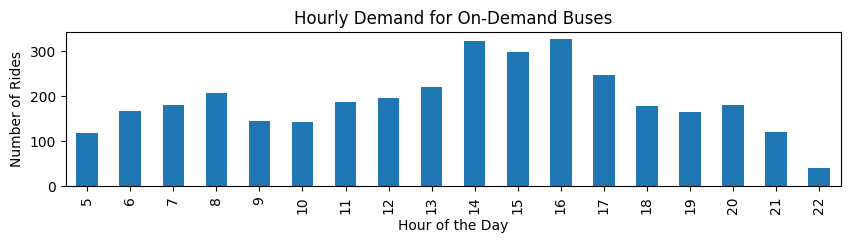

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Assuming merged_df is your DataFrame and it contains 'Actual Pickup Time' column
# Example:
# merged_df = pd.DataFrame({
#     'Actual Pickup Time': pd.to_datetime(['2023-10-01 08:00:00', '2023-10-01 09:00:00', '2023-10-01 10:00:00', ...])
# })

# Group by hour to see demand over the day
merged_df['Hour'] = merged_df['Actual Pickup Time'].dt.hour
hourly_demand = merged_df.groupby('Hour').size()

plt.figure(figsize=(10, 2))
hourly_demand.plot(kind='bar')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.title('Hourly Demand for On-Demand Buses')
plt.show()

In [48]:
hourly_demand

,Pickup ID,latitude,longitude,Hour,Count,Average Demand
0,0,48.992168,11.377365,5,1,0.033333
1,0,48.992168,11.377365,6,12,0.400000
2,0,48.992168,11.377365,7,8,0.266667
3,0,48.992168,11.377365,8,62,2.066667
4,0,48.992168,11.377365,9,8,0.266667
...,...,...,...,...,...,...
590,67,49.048472,11.431715,5,22,0.733333
591,67,49.048472,11.431715,11,4,0.133333
592,67,49.048472,11.431715,17,3,0.100000
593,68,49.015567,11.522882,9,1,0.033333


In [47]:
import folium
from folium.plugins import HeatMap

# Function to create and save heatmap
def create_heatmap(hour, data):
    map_osm = folium.Map(location=[data['latitude'].mean(), data['longitude'].mean()], zoom_start=12)
    heat_data = data[['latitude', 'longitude', 'Average Demand']].values.tolist()
    HeatMap(data=heat_data, radius=15).add_to(map_osm)
    map_osm.save(f'heatmap_hour_{hour}.html')

# Generate heatmap for each hour
for hour in range(24):
    hourly_data = hourly_demand[hourly_demand['Hour'] == hour]
    # create_heatmap(hour, hourly_data)

hourly_data

,Pickup ID,latitude,longitude,Hour,Count,Average Demand
